In [1]:
#타이타닉 호 승객 생존 에측 미니 프로젝트

import warnings
warnings.filterwarnings('ignore')

import numpy as np #데이터 수치 계산
import pandas as pd # 데이터 수집 라이브러리
import matplotlib.pyplot as plt #시각화 라이브러리
import seaborn as sns 


In [2]:
df = pd.read_excel("data/titanic.xls") # DataFrame 객체
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [4]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


<AxesSubplot:>

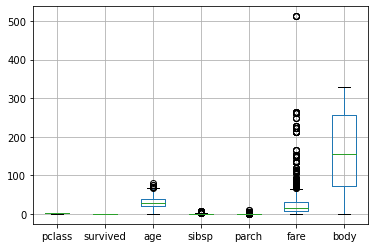

In [5]:
df.boxplot()
# 이상치를 확인할 수 있고 어떤 분포를 가지는지 확인할 수 있다.
# 초록색은 중앙값

In [6]:
df.isnull() # 각각의 값이 null인지 알아내는 것(False, True)
df.isnull().sum() # 

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [7]:
# df[조건]
# df[df['fare'].isnull()] 운임이 null인것을 출력
# df[df['age']>75] 나이가 75이상인 것을 출력
df['survived'].value_counts() # df['조건']의 카운트 출력
#0이 생존자, 1이 사망자

0    809
1    500
Name: survived, dtype: int64

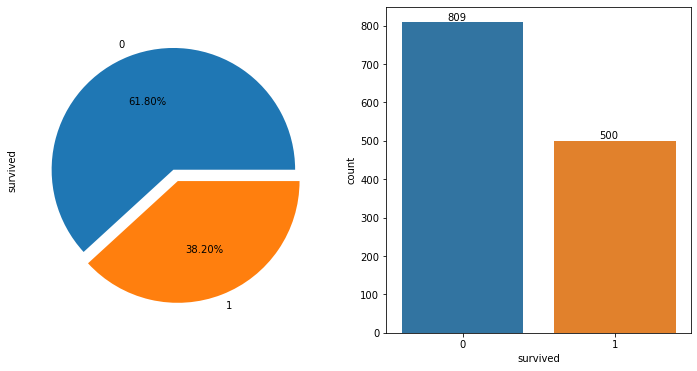

In [8]:
plt.figure(figsize=(12,6))
plt.subplot(121)
df['survived'].value_counts().plot.pie(explode=[0,0.1], autopct="%.2f%%") # 그래프에서 0은 고정 0.1만큼 떨어뜨려라 
plt.subplot(122)
g1 = sns.countplot('survived',data=df) # 그래프 객체 g1 생성
for p in g1.patches: #반복문에서 g1이 가지고 있는 patches(막대)를 끄집어 내면서
    g1.annotate(f"{p.get_height()}",(p.get_x()+0.3,p.get_height()+5)) # f옵션으로 변수들을 써서 결과를 출력한다
plt.savefig('survived1.png') #그래프를 그림으로 저장
plt.show()

<AxesSubplot:>

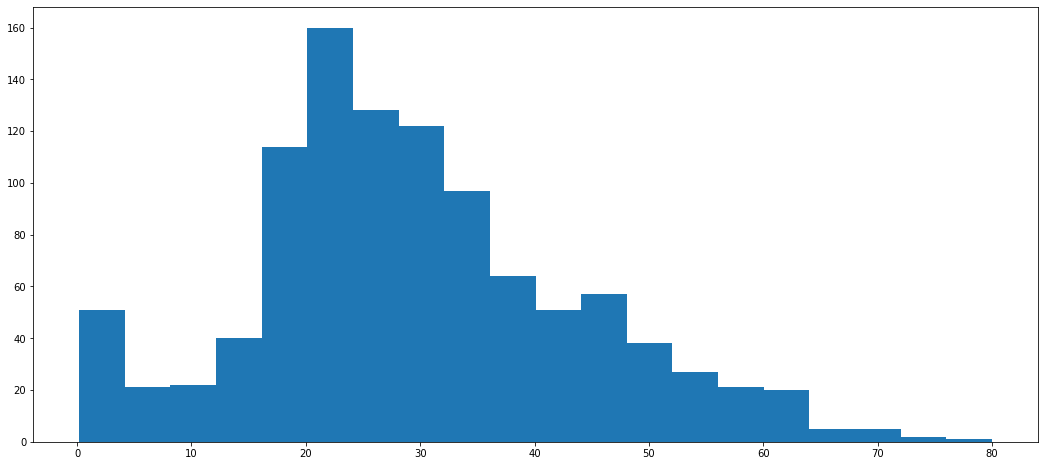

In [9]:
df['age'].hist(bins=20,grid=False,figsize = (18,8)) #정규분포 그래프

In [10]:
df.groupby(['sex','survived'])['survived'].count()

sex     survived
female  0           127
        1           339
male    0           682
        1           161
Name: survived, dtype: int64

In [11]:
df[['sex','survived']].groupby(['sex']).mean()

,survived
sex,
female,0.727468
male,0.190985


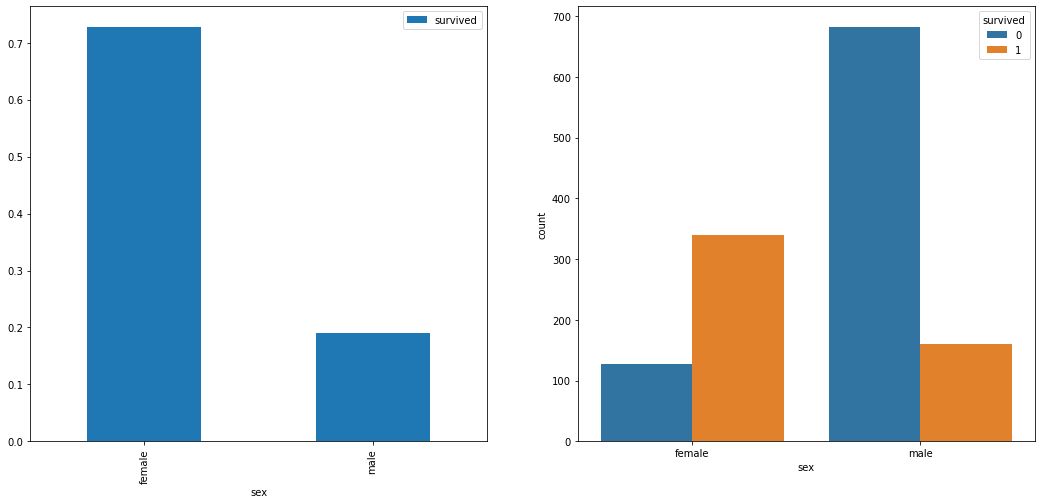

In [12]:
plt.figure(figsize=(18,8))
sub1 = plt.subplot(121)
df[['sex','survived']].groupby(['sex']).mean().plot.bar(ax=sub1)
plt.subplot(122)
sns.countplot('sex',hue='survived',data=df) #성별로 생존 막대 그래프
plt.show()

<AxesSubplot:xlabel='pclass'>

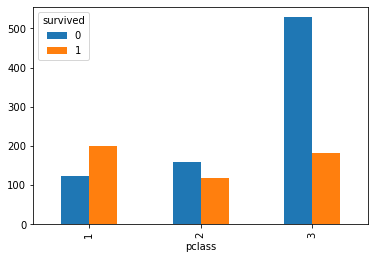

In [13]:
pd.crosstab(df['pclass'],df['survived']).plot.bar() #선실등급(행), 생존률(열)

In [14]:
pd.crosstab(df['pclass'],df['survived'],margins=True) #margins으로 합계를 볼 수 있다

survived,0,1,All
pclass,,,
1,123,200,323
2,158,119,277
3,528,181,709
All,809,500,1309


In [15]:
df.groupby('pclass').mean() #mean은 평균 구하는 것

,survived,age,sibsp,parch,fare,body
pclass,,,,,,
1,0.619195,39.159918,0.436533,0.365325,87.508992,162.828571
2,0.429603,29.506705,0.393502,0.368231,21.179196,167.387097
3,0.255289,24.816367,0.568406,0.400564,13.302889,155.818182


In [16]:
df.corr() # -1.0 ~ +1.0 

,pclass,survived,age,sibsp,parch,fare,body
pclass,1.000000,-0.312469,-0.408106,0.060832,0.018322,-0.558629,-0.034642
survived,-0.312469,1.000000,-0.055513,-0.027825,0.082660,0.244265,NaN
age,-0.408106,-0.055513,1.000000,-0.243699,-0.150917,0.178739,0.058809
sibsp,0.060832,-0.027825,-0.243699,1.000000,0.373587,0.160238,-0.099961
parch,0.018322,0.082660,-0.150917,0.373587,1.000000,0.221539,0.051099
fare,-0.558629,0.244265,0.178739,0.160238,0.221539,1.000000,-0.043110
body,-0.034642,NaN,0.058809,-0.099961,0.051099,-0.043110,1.000000


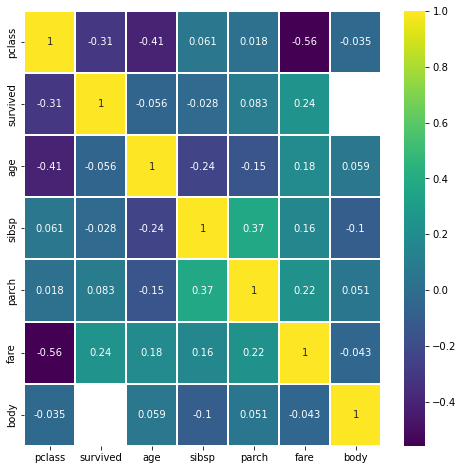

In [17]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),linewidth=0.01,annot=True,cmap=plt.cm.viridis)
plt.show()

In [18]:
df['age_cat'] = pd.cut(df['age'], bins=[0,10,20,50,80], include_lowest=True, labels=['baby','teenage','adult','old'])
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",adult
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",adult
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN,teenage
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN,adult
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN,adult


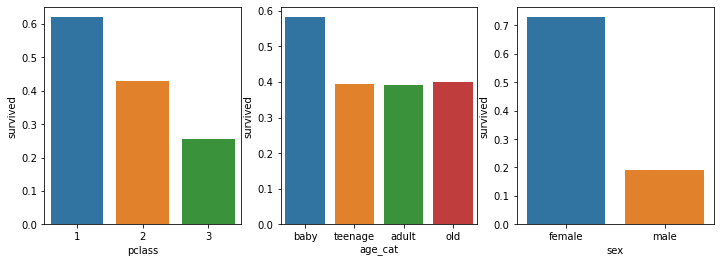

In [19]:
plt.figure(figsize=(12,4))
plt.subplot(131)
sns.barplot('pclass','survived',data=df,ci=None)
plt.subplot(132)
sns.barplot('age_cat','survived',data=df,ci=None) # 0~10세가 생존률이 높다
plt.subplot(133)
sns.barplot('sex','survived',data=df,ci=None)
plt.show()

In [20]:
df['sex'] = df['sex'].map({'female':1,'male':0} ) #female, male을 숫자로 바꿔주는 것
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat
0,1,1,"Allen, Miss. Elisabeth Walton",1,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",adult
1,1,1,"Allison, Master. Hudson Trevor",0,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby
2,1,0,"Allison, Miss. Helen Loraine",1,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby
3,1,0,"Allison, Mr. Hudson Joshua Creighton",0,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",adult
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",1,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN,teenage
1305,3,0,"Zabour, Miss. Thamine",1,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",0,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN,adult
1307,3,0,"Zakarian, Mr. Ortin",0,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN,adult


In [21]:
df = df[ df['fare'].notnull() ]
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat
0,1,1,"Allen, Miss. Elisabeth Walton",1,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",adult
1,1,1,"Allison, Master. Hudson Trevor",0,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby
2,1,0,"Allison, Miss. Helen Loraine",1,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby
3,1,0,"Allison, Mr. Hudson Joshua Creighton",0,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",adult
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",1,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN,teenage
1305,3,0,"Zabour, Miss. Thamine",1,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",0,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN,adult
1307,3,0,"Zakarian, Mr. Ortin",0,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN,adult


In [22]:
df.isnull().sum() 

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            0
cabin        1013
embarked        2
boat          822
body         1188
home.dest     563
age_cat       263
dtype: int64

In [23]:
# name의 ms, mr, master 등 호칭으로 다섯개의 그룹으로 나눈다 (25~47 변칙처리)
df['initial'] = 0
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat,initial
0,1,1,"Allen, Miss. Elisabeth Walton",1,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",adult,0
1,1,1,"Allison, Master. Hudson Trevor",0,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby,0
2,1,0,"Allison, Miss. Helen Loraine",1,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby,0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",0,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",adult,0
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",adult,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",1,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN,teenage,0
1305,3,0,"Zabour, Miss. Thamine",1,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN,NaN,0
1306,3,0,"Zakarian, Mr. Mapriededer",0,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN,adult,0
1307,3,0,"Zakarian, Mr. Ortin",0,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN,adult,0


In [24]:
for i in df:
    df['initial'] = df['name'].str.extract("([A-Za-z]+)\.") # Miss. ==> Miss 대소문자 한번나오고 .나오게 하기
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat,initial
0,1,1,"Allen, Miss. Elisabeth Walton",1,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",adult,Miss
1,1,1,"Allison, Master. Hudson Trevor",0,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby,Master
2,1,0,"Allison, Miss. Helen Loraine",1,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby,Miss
3,1,0,"Allison, Mr. Hudson Joshua Creighton",0,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",adult,Mr
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",adult,Mrs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",1,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN,teenage,Miss
1305,3,0,"Zabour, Miss. Thamine",1,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN,NaN,Miss
1306,3,0,"Zakarian, Mr. Mapriededer",0,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN,adult,Mr
1307,3,0,"Zakarian, Mr. Ortin",0,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN,adult,Mr


In [25]:
# Mr, Mrs, Miss, Master(아이), Other
list(np.sort(df['initial'].unique()))

['Capt',
 'Col',
 'Countess',
 'Don',
 'Dona',
 'Dr',
 'Jonkheer',
 'Lady',
 'Major',
 'Master',
 'Miss',
 'Mlle',
 'Mme',
 'Mr',
 'Mrs',
 'Ms',
 'Rev',
 'Sir']

In [26]:
initial = ['Capt', 'Col', 'Countess', 'Don', 'Dona', 'Dr', 'Jonkheer', 'Lady',
       'Major', 'Master', 'Miss', 'Mlle', 'Mme', 'Mr', 'Mrs', 'Ms', 'Rev',
       'Sir']

In [27]:
# Mr, Mrs, Miss, Master(아이), Other
before = ['Capt', 'Col', 'Countess', 'Don', 'Dona', 'Dr', 'Jonkheer', 'Lady','Major','Mlle', 
          'Mme', 'Ms', 'Rev', 'Sir']

after = ['Mr', 'Mr','Mrs','Mr','Miss','Other','Mr','Mrs','Mr','Miss','Mrs','Miss','Other','Mr']

df['initial'].replace(before,after,inplace =True) # inplace는 내부 상태가 변환됨
# df['initial'] = df['initial'].replace(before,after) 변환된 결과를 다시 넣는 것
df['initial'].unique()

array(['Miss', 'Master', 'Mr', 'Mrs', 'Other'], dtype=object)

In [28]:
df[df['initial']=='Master']['age'].mean() # 체인 방식(연속적)으로 평균을 구함

5.482703773584906

In [29]:
df.groupby('initial')['age'].mean()

initial
Master     5.482704
Miss      21.904595
Mr        32.522034
Mrs       36.959538
Other     42.333333
Name: age, dtype: float64

In [30]:
df.loc[ (df['age'].isnull()) & ( df['initial']=='Master' ) ] # loc는 위치를 찾는 속성

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat,initial
672,3,0,"Betros, Master. Seman",0,NaN,0,0,2622,7.2292,NaN,C,NaN,NaN,NaN,NaN,Master
900,3,0,"Johnston, Master. William Arthur ""Willie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN,NaN,NaN,NaN,Master
954,3,0,"Lefebre, Master. Henry Forbes",0,NaN,3,1,4133,25.4667,NaN,S,NaN,NaN,NaN,NaN,Master
1034,3,1,"Moubarek, Master. Gerios",0,NaN,1,1,2661,15.2458,NaN,C,C,NaN,NaN,NaN,Master
1035,3,1,"Moubarek, Master. Halim Gonios (""William George"")",0,NaN,1,1,2661,15.2458,NaN,C,C,NaN,NaN,NaN,Master
1121,3,1,"Peter, Master. Michael J",0,NaN,1,1,2668,22.3583,NaN,C,C,NaN,NaN,NaN,Master
1170,3,0,"Sage, Master. Thomas Henry",0,NaN,8,2,CA. 2343,69.5500,NaN,S,NaN,NaN,NaN,NaN,Master
1262,3,0,"van Billiard, Master. James William",0,NaN,1,1,A/5. 851,14.5000,NaN,S,NaN,NaN,NaN,NaN,Master


In [31]:
df.loc[ (df['age'].isnull()) & ( df['initial']=='Master' ) ,'age' ] # age만 출력

672    NaN
900    NaN
954    NaN
1034   NaN
1035   NaN
1121   NaN
1170   NaN
1262   NaN
Name: age, dtype: float64

In [32]:
df.loc[ (df['age'].isnull()) & ( df['initial']=='Master' ) ,'age' ] = 5
df.loc[ (df['age'].isnull()) & ( df['initial']=='Miss' ) ,'age' ] = 22
df.loc[ (df['age'].isnull()) & ( df['initial']=='Mr' ) ,'age' ] = 33
df.loc[ (df['age'].isnull()) & ( df['initial']=='Mrs' ) ,'age' ] = 37
df.loc[ (df['age'].isnull()) & ( df['initial']=='Other' ) ,'age' ] = 42


In [49]:
df.to_csv('titanic_ok.csv',index = False)

In [34]:
# 데이터 x와 정답 y --> 데이터 전처리( cell 50-51 )

In [35]:
# X
# [ 선실등급, 성별, 나이, 부모형제_수, 부몬 자식_수, 운임 ]
x_cols = ['pclass','sex','age','sibsp','parch','fare']
X = df[x_cols].values
X

array([[  1.    ,   1.    ,  29.    ,   0.    ,   0.    , 211.3375],
       [  1.    ,   0.    ,   0.9167,   1.    ,   2.    , 151.55  ],
       [  1.    ,   1.    ,   2.    ,   1.    ,   2.    , 151.55  ],
       ...,
       [  3.    ,   0.    ,  26.5   ,   0.    ,   0.    ,   7.225 ],
       [  3.    ,   0.    ,  27.    ,   0.    ,   0.    ,   7.225 ],
       [  3.    ,   0.    ,  29.    ,   0.    ,   0.    ,   7.875 ]])

In [36]:
# y
y = df['survived'].values
y

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [37]:
# ML 코딩 5단계
# 1. 훈련 데이터와 테스트 데이터를 준비
#   - Underfiting과 Overfiting을 조심해야함
# 2. ML 알고리즘 선택
# 3. 훈련
# 4. 평가
# 5. 새로운 데이터로 예측

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=7) # 개연성(항상 같은 값이 나옴)
X_train

array([[ 1.    ,  0.    , 39.    ,  0.    ,  0.    , 29.7   ],
       [ 1.    ,  0.    , 27.    ,  0.    ,  0.    , 76.7292],
       [ 3.    ,  1.    , 22.    ,  1.    ,  0.    , 24.15  ],
       ...,
       [ 2.    ,  0.    , 34.    ,  0.    ,  0.    , 13.    ],
       [ 3.    ,  0.    , 32.    ,  0.    ,  0.    ,  8.05  ],
       [ 1.    ,  0.    , 41.    ,  1.    ,  0.    , 51.8625]])